In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [20]:
df = sns.load_dataset('iris')

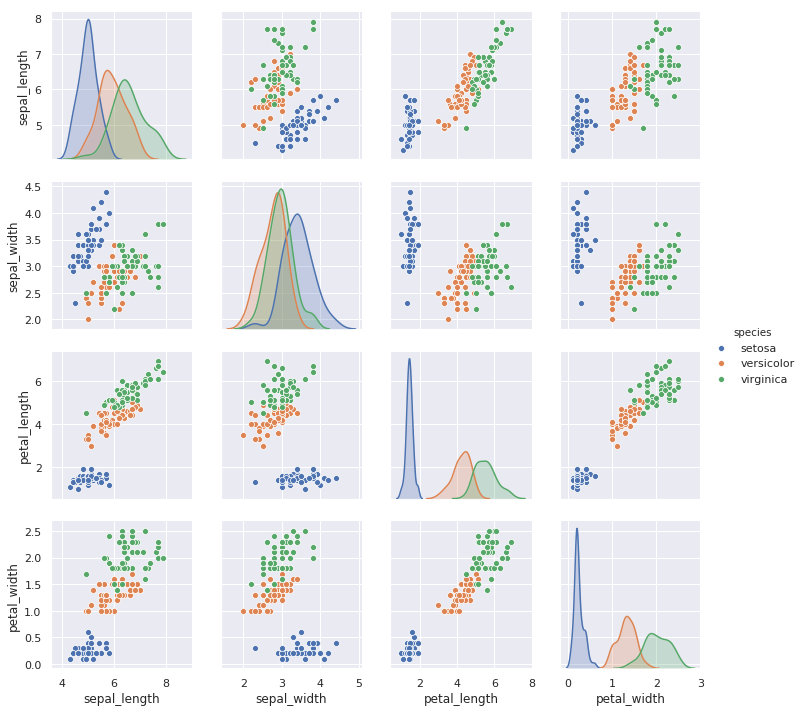

In [21]:
sns.pairplot(df, hue='species')

# Simple Linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
df = pd.read_csv('data/housing/housing.data', header=None, delim_whitespace=True)
display(df[:3])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per `$10,000`
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [27]:
cols = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
print(len(cols))
df.columns = cols
display(df[:4])

14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4


In [31]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


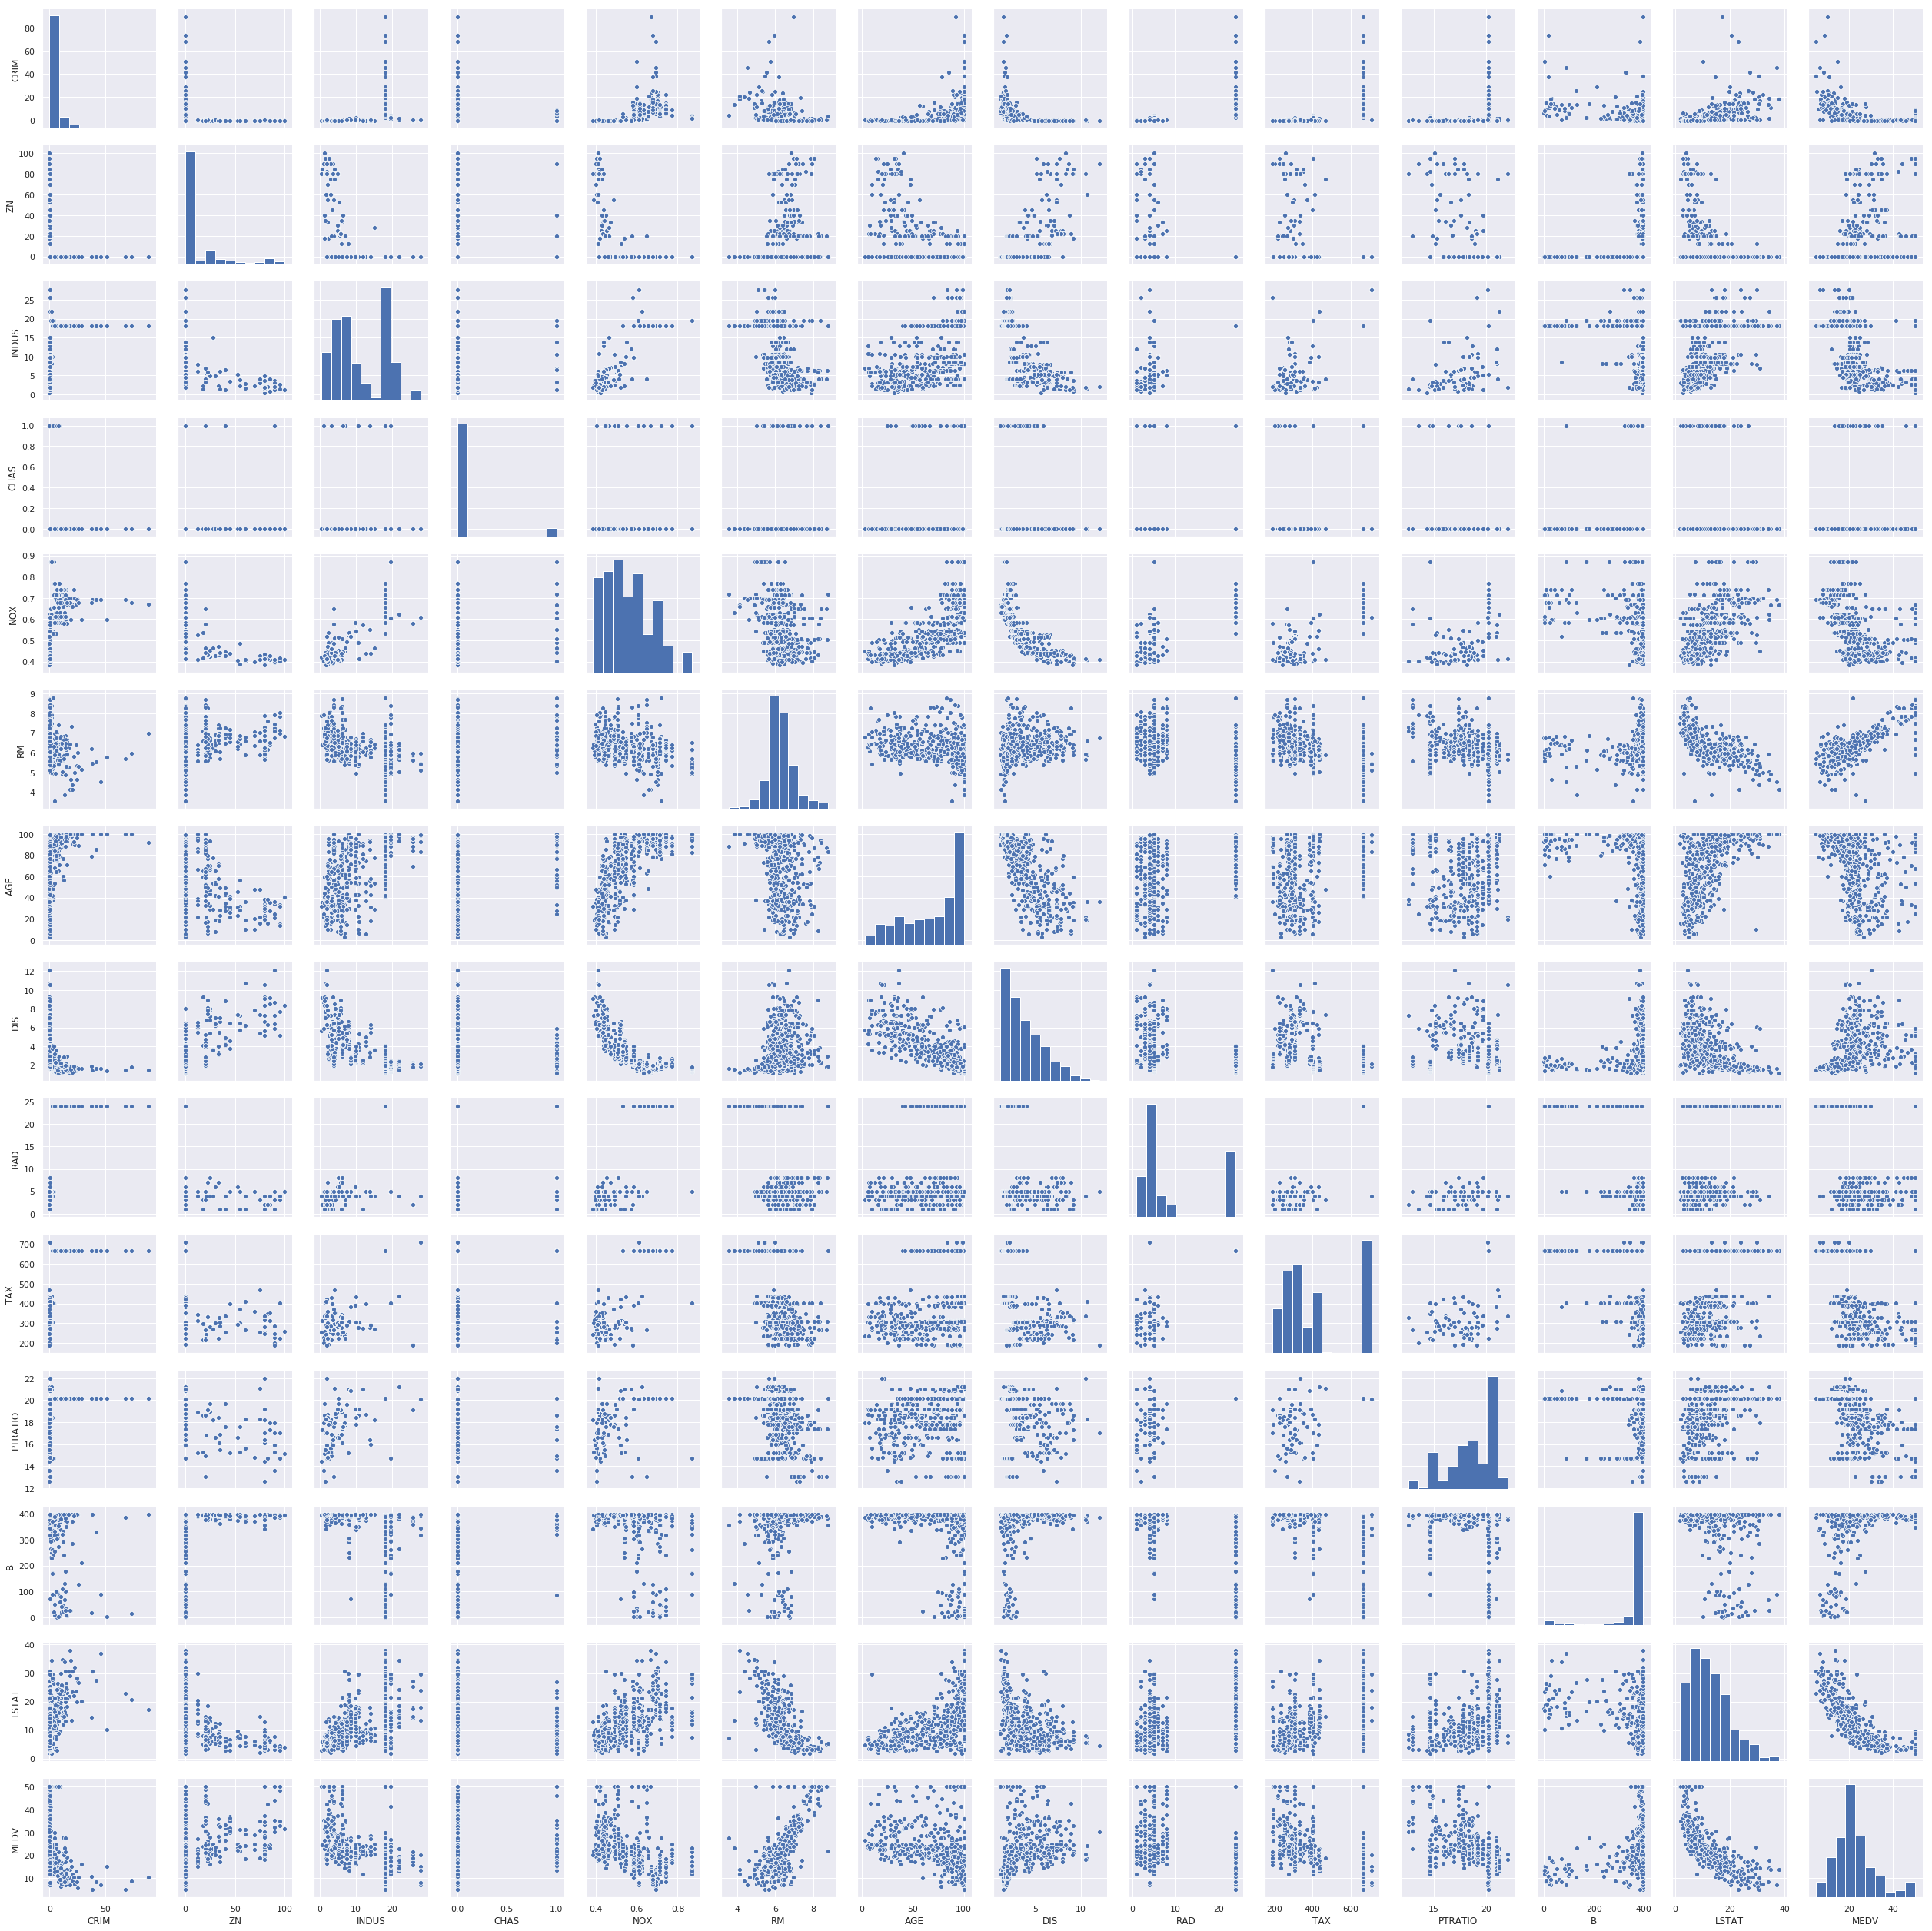

In [32]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


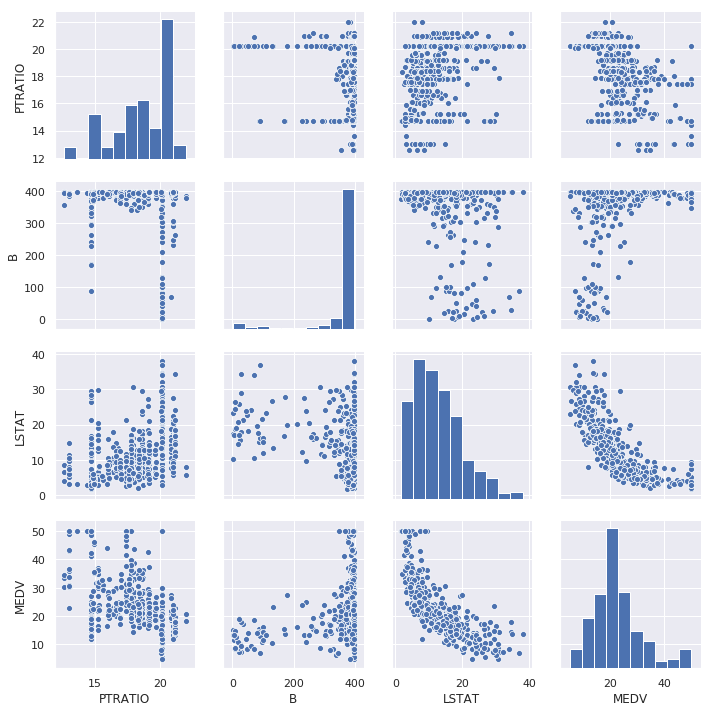

In [37]:
df_study = df[["PTRATIO", "B", "LSTAT", "MEDV"]]
sns.pairplot(df_study, size=2.5)

## Correlation analysis

In [39]:
pd.options.display.float_format = '{:,.4f}'.format
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556,-0.3883
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130,0.3604
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038,-0.4837
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539,0.1753
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909,-0.4273
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138,0.6954
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023,-0.3770
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970,0.2499
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887,-0.3816
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440,-0.4685


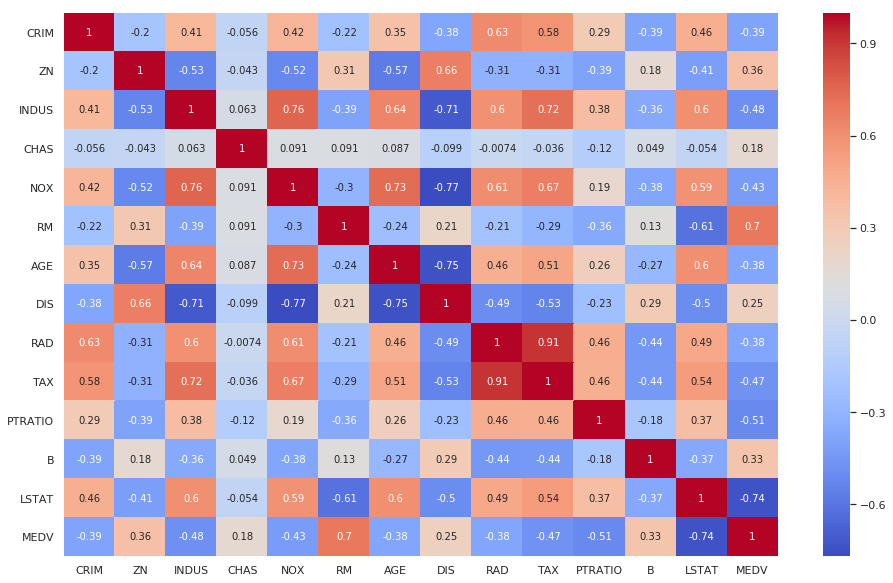

In [43]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## Linear Regression for Boston housing

In [51]:
cor_matrix = df.corr().values
select_idx = np.where(abs(cor_matrix[-1]) > 0.4)
print(select_idx)

(array([ 2,  4,  5,  9, 10, 12, 13]),)


Index(['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'], dtype='object')


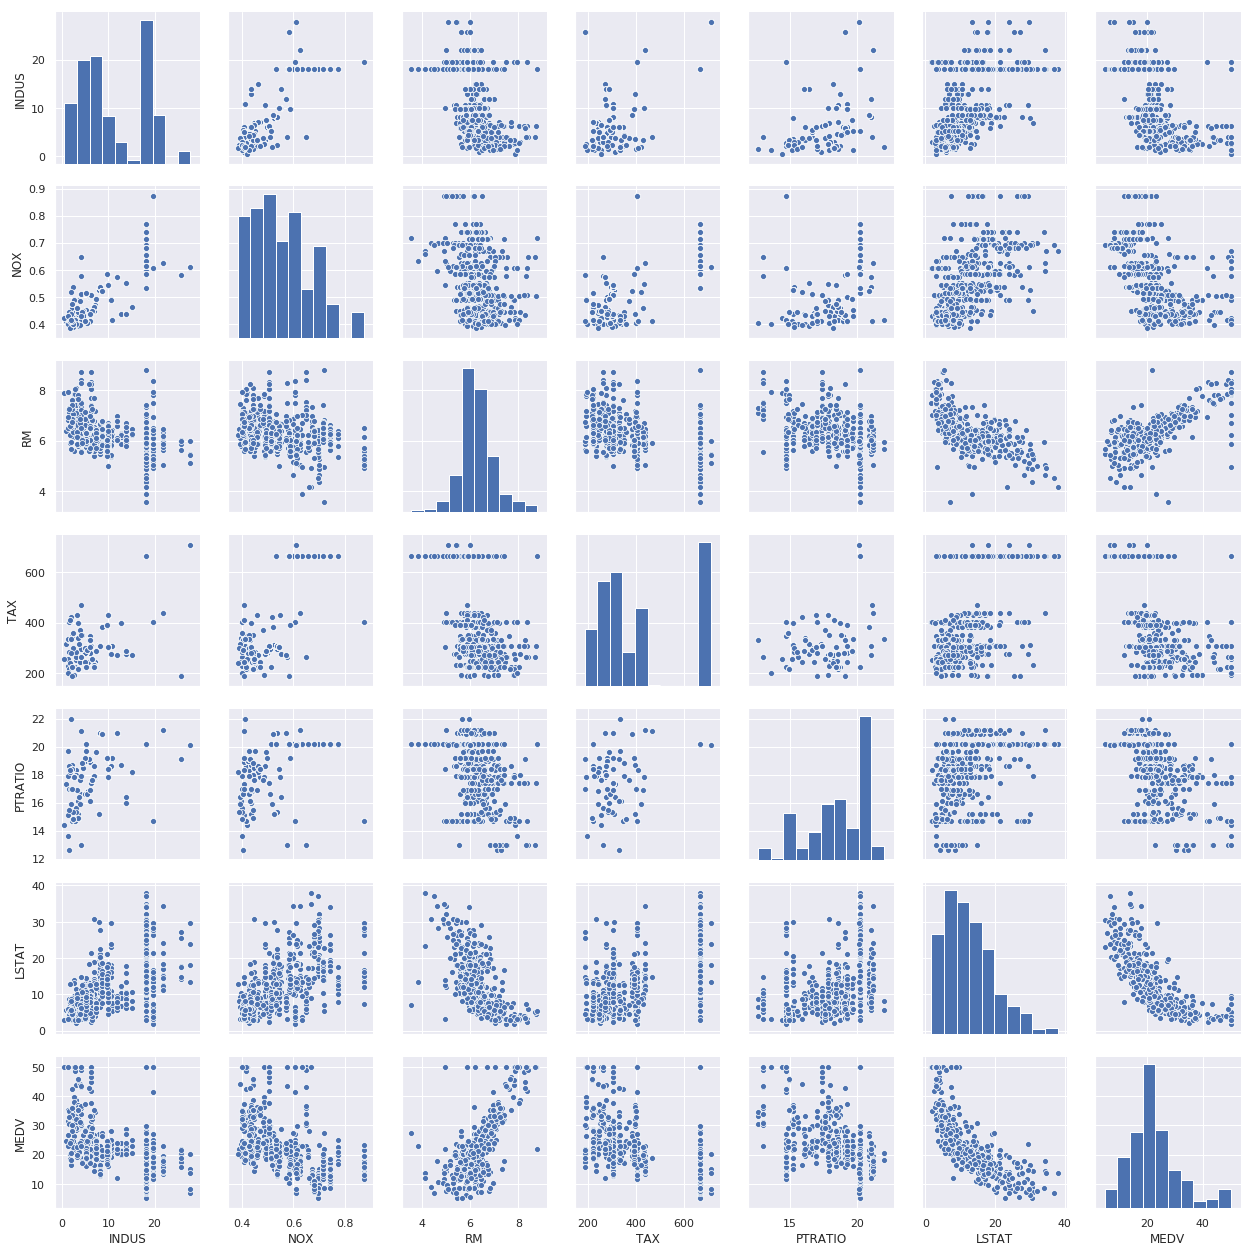

In [54]:
relevent_cols = df.columns[select_idx]
print(relevent_cols)
sns.pairplot(df[relevent_cols])

(506, 6) (506,)


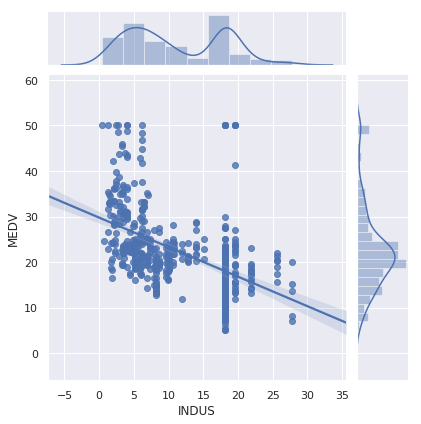

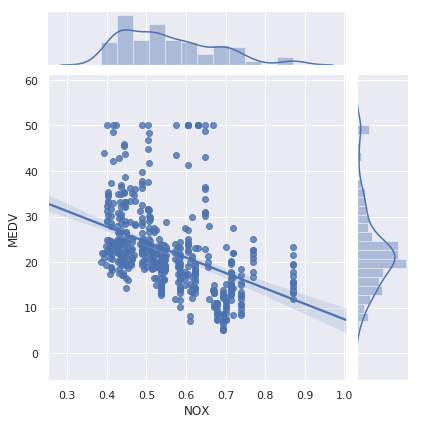

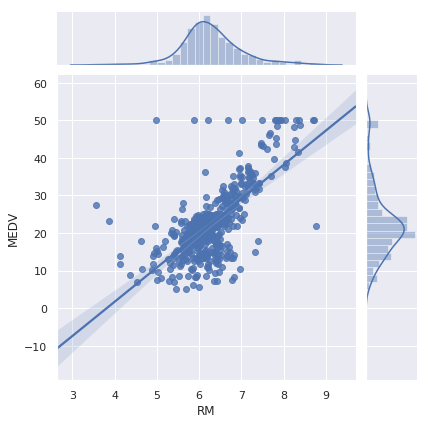

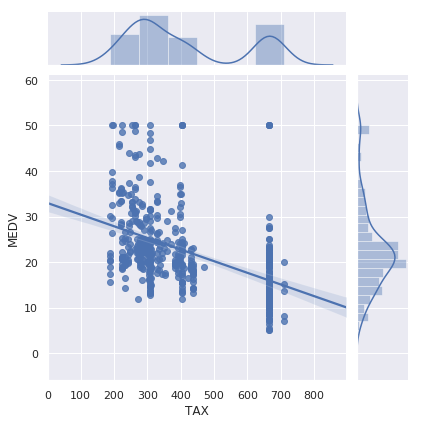

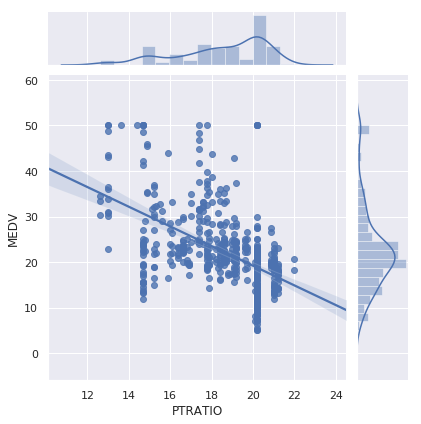

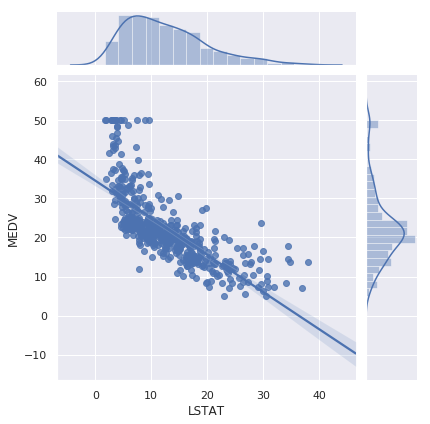

In [64]:
X = df[relevent_cols[:-1]].values
y = df[relevent_cols[-1]].values
print(X.shape, y.shape)
for i in range(1, 7):
    sns.jointplot(x=relevent_cols[i-1], y=relevent_cols[-1], data=df, kind='reg')
    plt.xlabel(relevent_cols[i-1])
    plt.ylabel(relevent_cols[-1])

In [66]:
X_train = X[: 400]
y_train = y[: 400]
X_test = X[400:]
y_test = y[400:]

## Robust Regression

In [67]:
from sklearn.linear_model import RANSACRegressor

In [68]:
ransac = RANSACRegressor()

In [69]:
ransac.fit(X_train, y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [70]:
ransac.predict(X_test)

array([ 7.21320542, 12.99323288, 13.53279558,  4.49449895,  2.95942026,
        6.10489715, -7.78006816,  9.73787976,  3.62343879, 17.18913876,
       11.55807404, 14.88469359, -8.33864514,  2.16970588, -9.87553911,
       10.12624461, 14.52289321,  1.1993938 ,  9.4094214 , 16.3478912 ,
       15.90057772, 12.06564538,  9.04634856,  9.25720771,  6.90368348,
        7.32206306,  9.89636922, 14.07103556, 11.11050087, 11.69813248,
       13.57911546, 16.99247393, 16.56435062, 15.60030141, 14.03119157,
       14.53131977, 15.20544958,  9.03526589,  4.0143081 ,  5.89649975,
        7.89002968, 14.11754796, 13.68222602, 15.08679872,  7.51446247,
       12.74682265, 14.25914115, 14.02486302, 12.6108246 , 14.16153145,
       17.84554473, 16.90105301, 13.94795607, 23.78660591, 17.13841811,
       15.59527899, 10.41401288, 10.9150115 , 14.41118099, 13.10988453,
       17.84409072, 15.71992   , 15.47371692, 18.71726387, 14.54405039,
       10.21943775, 10.67037822,  9.03590822,  9.65257816,  9.17

In [73]:
ransac.inlier_mask_

array([False, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False,